In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import csv

In [2]:
cur_path = '/Users/sonalichaudhari/Desktop/ADS_Project/Data'
df = pd.read_csv(open(cur_path+'/dataweatherclean.csv','rU'), encoding='utf-8')

In [3]:
df.shape

(8058349, 36)

In [4]:
df['CRSDep_hour'] = df['CRSDepTime'].apply(lambda x: str(x)[:-2])
df['CRSDep_min'] = df['CRSDepTime'].apply(lambda x: str(x)[1:3] if len(str(x))==3 else  str(x)[2:4])
df = df.replace('', 0)
df['CRSArr_hour'] = df['CRSArrTime'].apply(lambda x: str(x)[:-2])
df['CRSArr_min'] = df['CRSArrTime'].apply(lambda x: str(x)[1:3] if len(str(x))==3 else  str(x)[2:4])
df = df.replace('', 0)

In [5]:
df['Scheduled_Dep_T'] = df.CRSDep_hour.astype(str).str.cat(df.CRSDep_min.astype(str), sep=':')
df['Scheduled_Arr_T'] = df.CRSArr_hour.astype(str).str.cat(df.CRSArr_min.astype(str), sep=':')

In [6]:
df[['CRSDep_hour','CRSDep_min','CRSArr_hour','CRSArr_min']] = df[['CRSDep_hour','CRSDep_min','CRSArr_hour','CRSArr_min']].astype(int)

In [125]:
S =df[['OriginCityName','DestCityName','Origin','Dest','UniqueCarrier']]
P = df['Flight_Status']

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

S['carrier'] = label_encoder.fit_transform(S['UniqueCarrier'])
S['origin'] = label_encoder.fit_transform(S['Origin'])
S['dest'] = label_encoder.fit_transform(S['Dest'])
S['ori_city'] = label_encoder.fit_transform(S['OriginCityName'])
S['dest_city'] = label_encoder.fit_transform(S['DestCityName'])


S =  S._get_numeric_data()


import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

# Build a classification task using 3 informative features
S, P = make_classification(n_samples=1000,
                           n_features=5,
                           n_informative=3,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=2,
                           random_state=0,
                           shuffle=False)

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(S, P)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f],importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(figsize=(18, 10))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

Feature ranking:
1. feature 1 (0.354203)
2. feature 2 (0.280458)
3. feature 0 (0.242652)
4. feature 3 (0.061622)
5. feature 4 (0.061066)


IndexError: index 5 is out of bounds for axis 0 with size 5

In [55]:
cols = df.columns.tolist()
cols.remove('Flight_Status')
cols.remove('CRSArrTime')
cols.remove('CRSDepTime')
cols.remove('DepDelayMinutes')
len(cols)

38

In [56]:
X = df[cols]
y = df['DepDelayMinutes']

In [57]:
X.columns

Index(['FlightDate', 'FlightNum', 'Year', 'Day', 'Month', 'Week', 'Origin',
       'Dest', 'UniqueCarrier', 'Cancelled', 'ArrTime', 'ArrTimeBlk',
       'DepTime', 'DepTimeBlk', 'DepDel15', 'ArrDel15', 'CRSElapsedTime',
       'ActualElapsedTime', 'WheelsOn', 'WheelsOff', 'LateAircraftDelay',
       'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
       'ArrDelayMinutes', 'OriginCityName', 'DestCityName', 'Distance',
       'OriginVisibility', 'OriginWind', 'OriginPrecip', 'CRSDep_hour',
       'CRSDep_min', 'CRSArr_hour', 'CRSArr_min', 'Scheduled_Dep_T',
       'Scheduled_Arr_T'],
      dtype='object')

In [58]:
len(X.columns)

38

In [59]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

X['carrier'] = label_encoder.fit_transform(X['UniqueCarrier'])
X['origin'] = label_encoder.fit_transform(X['Origin'])
X['dest'] = label_encoder.fit_transform(X['Dest'])
X['ori_city'] = label_encoder.fit_transform(X['OriginCityName'])
X['dest_city'] = label_encoder.fit_transform(X['DestCityName'])
X['arrtimeblk'] = label_encoder.fit_transform(X['ArrTimeBlk'])
X['deptimeblk'] = label_encoder.fit_transform(X['DepTimeBlk'])

X = X._get_numeric_data()

In [60]:
X.columns.tolist()

['FlightNum',
 'Year',
 'Day',
 'Month',
 'Week',
 'Cancelled',
 'ArrTime',
 'DepTime',
 'DepDel15',
 'ArrDel15',
 'CRSElapsedTime',
 'ActualElapsedTime',
 'WheelsOn',
 'WheelsOff',
 'LateAircraftDelay',
 'CarrierDelay',
 'WeatherDelay',
 'NASDelay',
 'SecurityDelay',
 'ArrDelayMinutes',
 'Distance',
 'OriginVisibility',
 'OriginWind',
 'OriginPrecip',
 'CRSDep_hour',
 'CRSDep_min',
 'CRSArr_hour',
 'CRSArr_min',
 'carrier',
 'origin',
 'dest',
 'ori_city',
 'dest_city',
 'arrtimeblk',
 'deptimeblk']

In [14]:
c=0
for i in X.columns.tolist():
    print(c,'',i)
    c=c+1

0  FlightNum
1  Year
2  Day
3  Month
4  Week
5  Cancelled
6  ArrTime
7  DepTime
8  DepDel15
9  ArrDel15
10  CRSElapsedTime
11  ActualElapsedTime
12  WheelsOn
13  WheelsOff
14  LateAircraftDelay
15  CarrierDelay
16  WeatherDelay
17  NASDelay
18  SecurityDelay
19  ArrDelayMinutes
20  Distance
21  OriginVisibility
22  OriginWind
23  OriginPrecip
24  CRSDep_hour
25  CRSDep_min
26  CRSArr_hour
27  CRSArr_min
28  carrier
29  origin
30  dest
31  ori_city
32  dest_city
33  arrtimeblk
34  deptimeblk


Feature ranking:
1. feature 1 (0.182741)
2. feature 2 (0.075506)
3. feature 0 (0.060142)
4. feature 21 (0.022488)
5. feature 18 (0.021246)
6. feature 12 (0.020784)
7. feature 26 (0.020685)
8. feature 11 (0.020384)
9. feature 17 (0.020120)
10. feature 23 (0.020106)
11. feature 7 (0.020030)
12. feature 31 (0.020026)
13. feature 4 (0.019918)
14. feature 9 (0.019854)
15. feature 6 (0.019823)
16. feature 24 (0.019786)
17. feature 5 (0.019774)
18. feature 36 (0.019698)
19. feature 19 (0.019685)
20. feature 32 (0.019665)
21. feature 14 (0.019570)
22. feature 8 (0.019532)
23. feature 35 (0.019451)
24. feature 25 (0.019327)
25. feature 3 (0.019295)
26. feature 29 (0.019103)
27. feature 27 (0.019028)
28. feature 10 (0.019009)
29. feature 34 (0.018623)
30. feature 22 (0.018614)
31. feature 16 (0.018552)
32. feature 37 (0.018540)
33. feature 33 (0.018349)
34. feature 20 (0.018322)
35. feature 15 (0.018246)
36. feature 28 (0.018193)
37. feature 30 (0.017906)
38. feature 13 (0.017880)


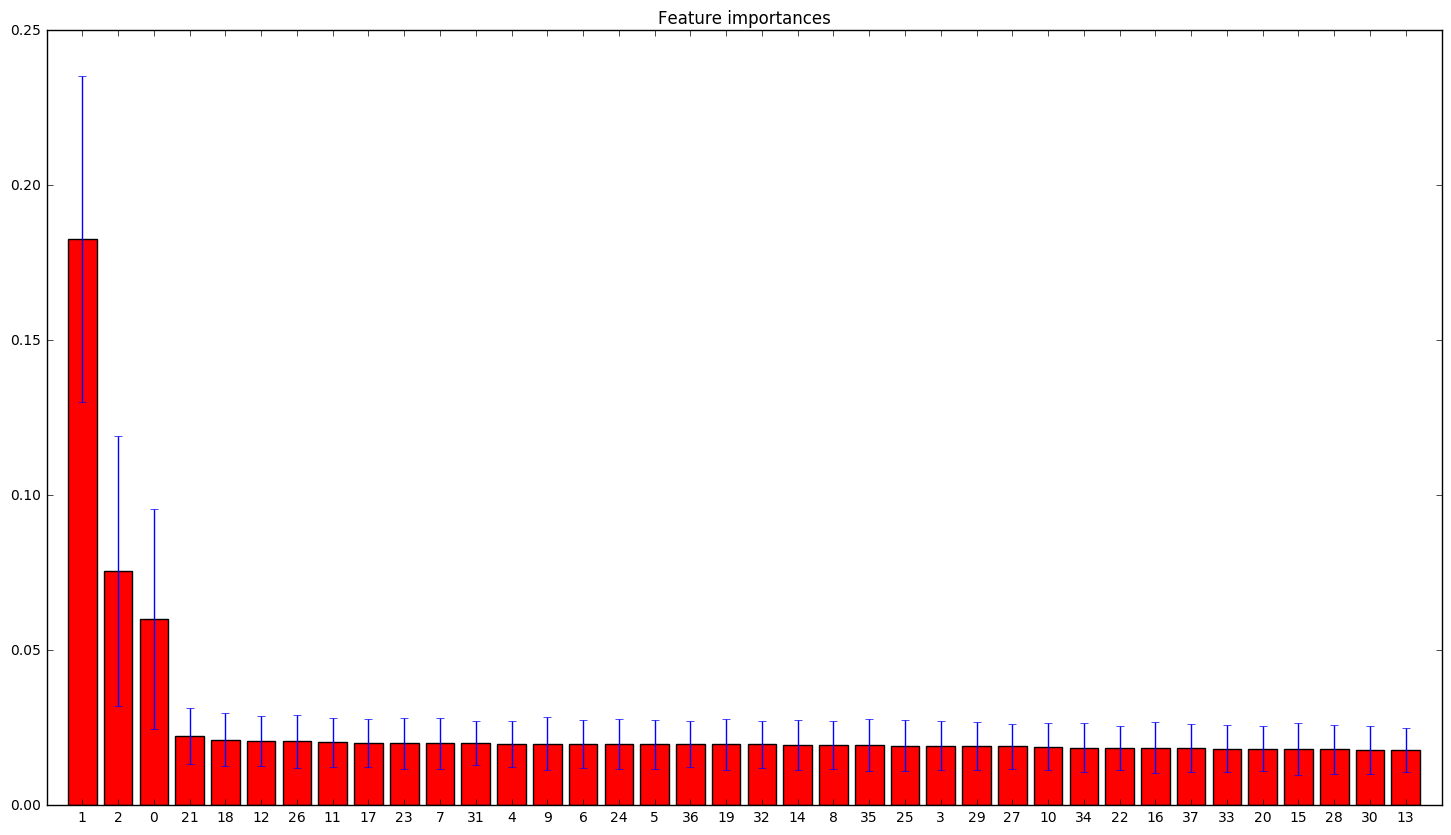

In [15]:
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

# Build a classification task using 3 informative features
X, y = make_classification(n_samples=1000,
                           n_features=38,
                           n_informative=3,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=2,
                           random_state=0,
                           shuffle=False)

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f],importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(figsize=(18, 10))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

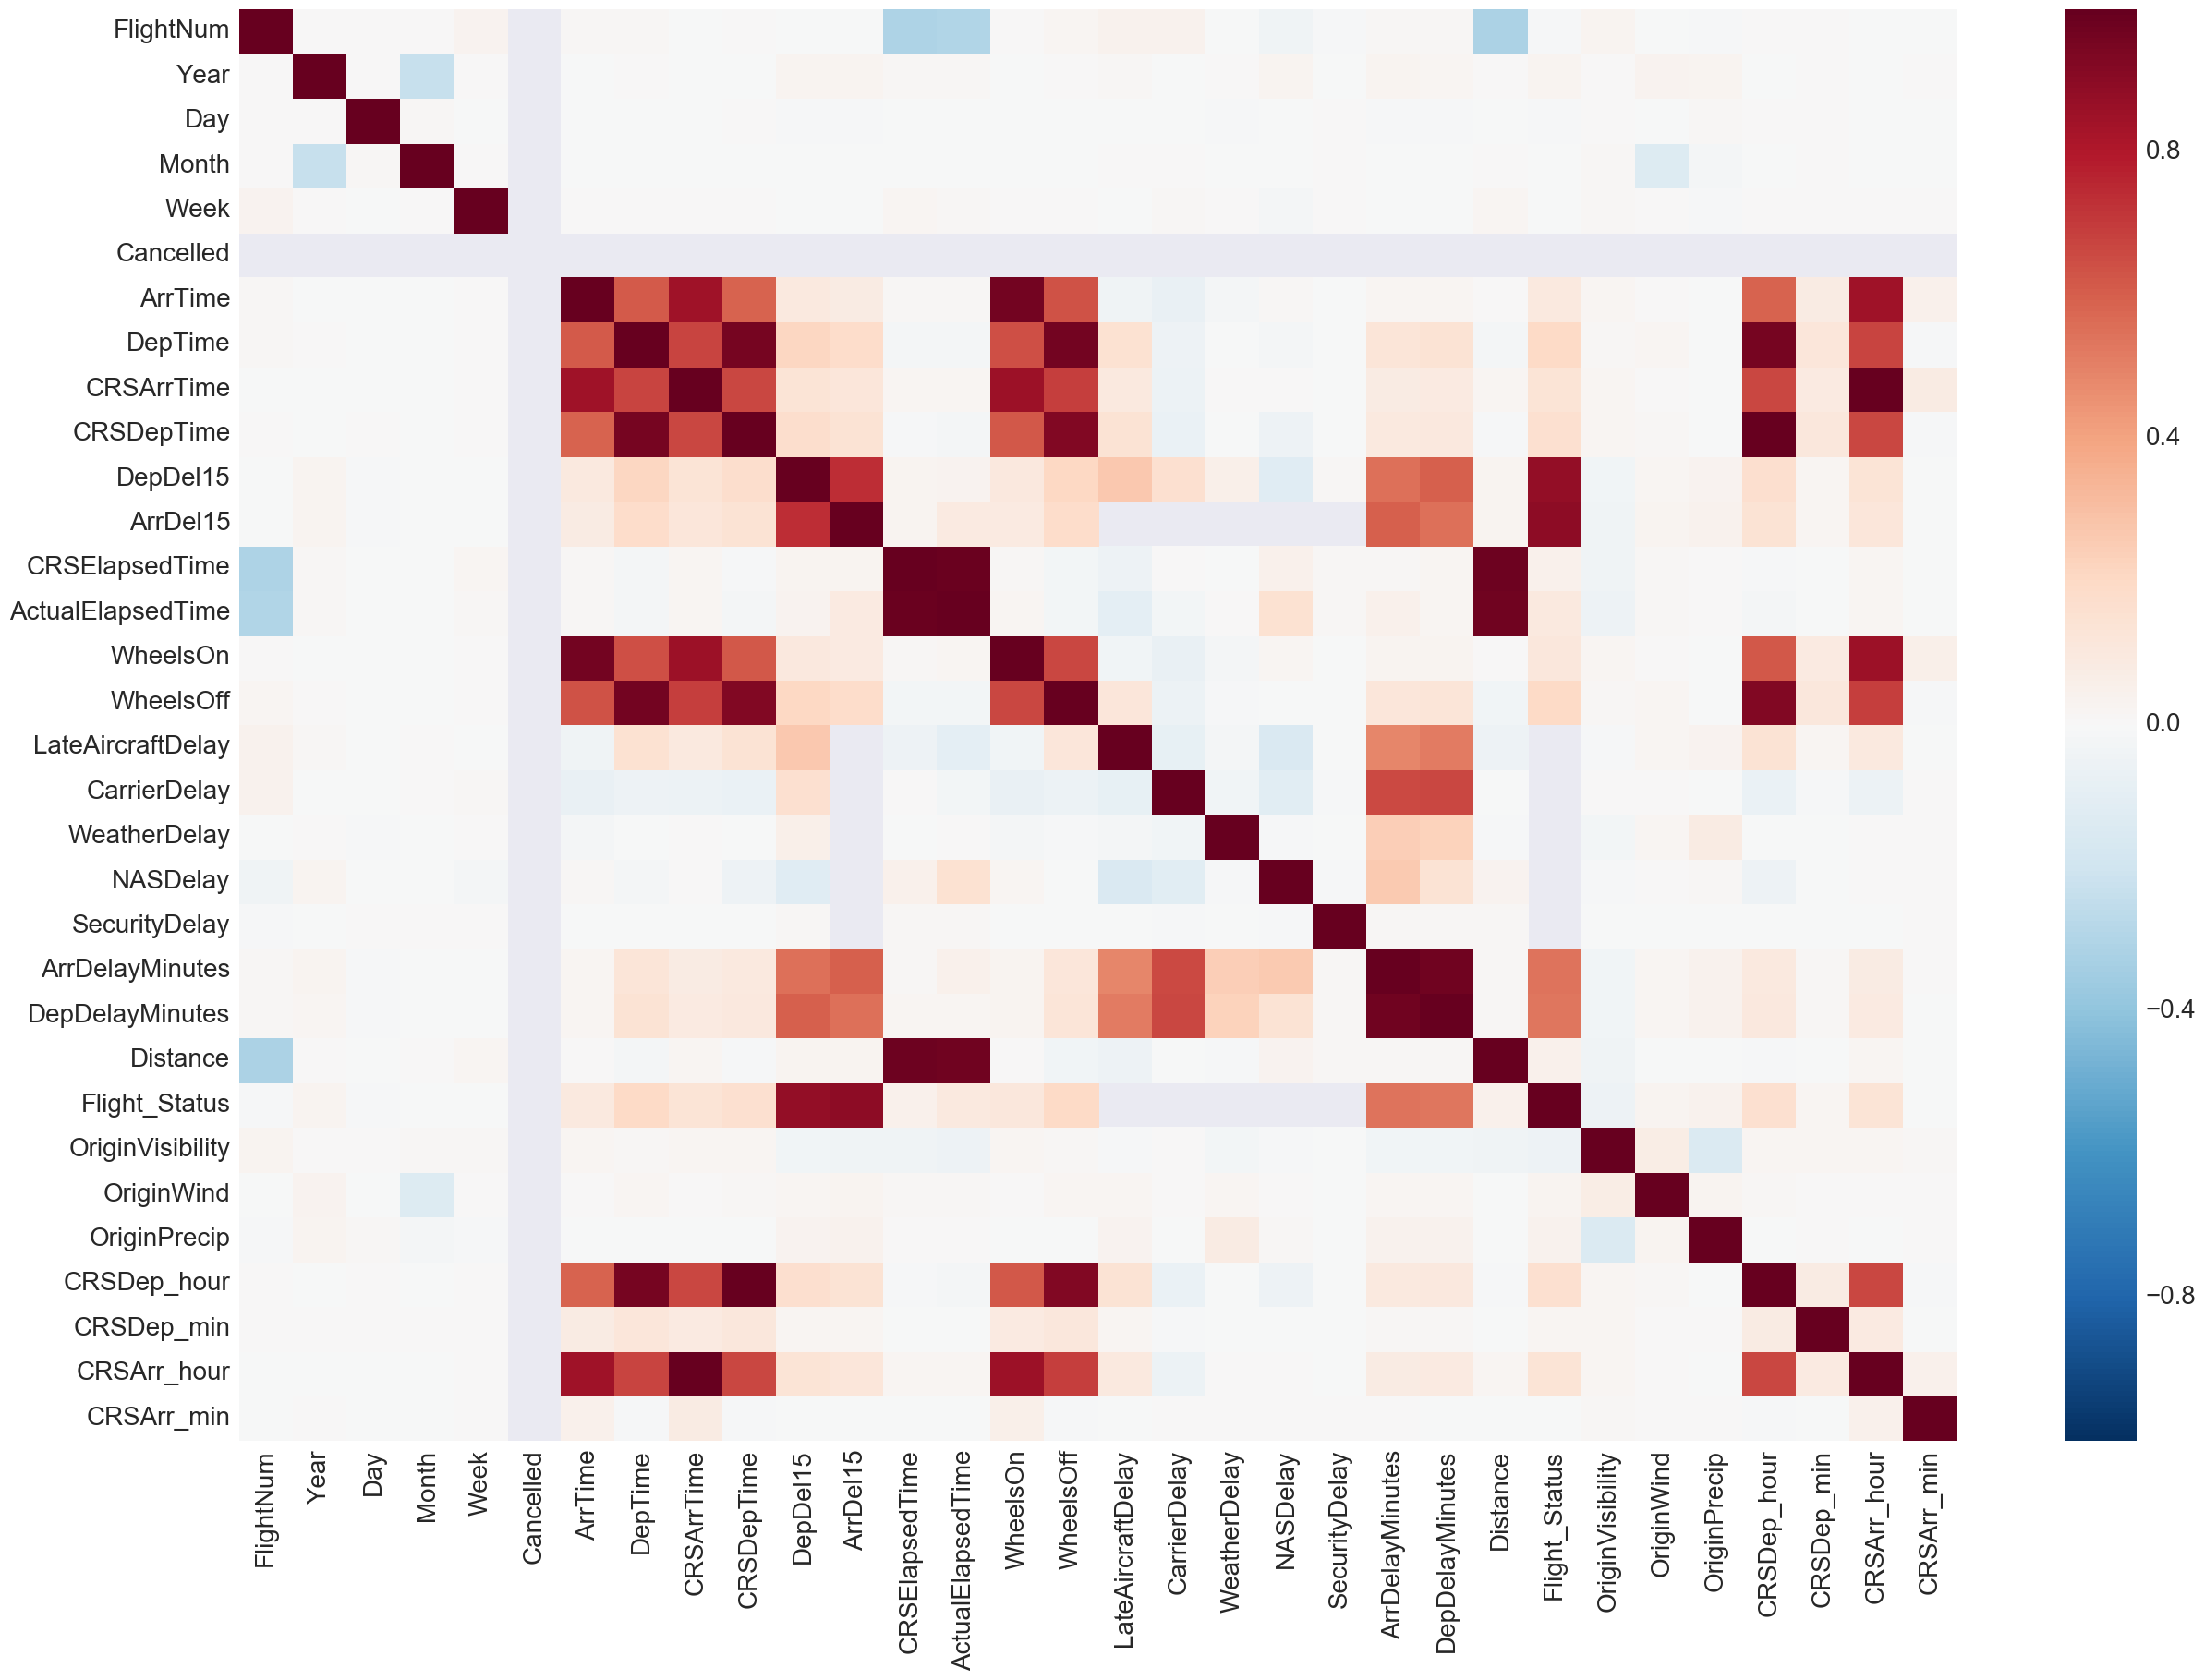

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
color = sns.color_palette()
plt.figure(figsize = (30,20))
sns.set(font_scale = 2)
sns.heatmap(data=df.corr())
plt.show()
plt.gcf().clear()

# PREDICTION

In [128]:
pred = df[df.DepDel15==1]
pred.shape

(1457628, 42)

In [129]:
pred.isnull().sum()

FlightDate                0
FlightNum                 0
Year                      0
Day                       0
Month                     0
Week                      0
Origin                    0
Dest                      0
UniqueCarrier             0
Cancelled                 0
ArrTime                   0
ArrTimeBlk                0
DepTime                   0
DepTimeBlk                0
CRSArrTime                0
CRSDepTime                0
DepDel15                  0
ArrDel15                  0
CRSElapsedTime            0
ActualElapsedTime         0
WheelsOn                  0
WheelsOff                 0
LateAircraftDelay    294876
CarrierDelay         294876
WeatherDelay         294876
NASDelay             294876
SecurityDelay        294876
ArrDelayMinutes           0
DepDelayMinutes           0
OriginCityName            0
DestCityName              0
Distance                  0
Flight_Status             0
OriginVisibility          0
OriginWind                0
OriginPrecip        

In [130]:
pred = pred[pred.LateAircraftDelay.notnull()]

In [131]:
pred.isnull().sum()

FlightDate           0
FlightNum            0
Year                 0
Day                  0
Month                0
Week                 0
Origin               0
Dest                 0
UniqueCarrier        0
Cancelled            0
ArrTime              0
ArrTimeBlk           0
DepTime              0
DepTimeBlk           0
CRSArrTime           0
CRSDepTime           0
DepDel15             0
ArrDel15             0
CRSElapsedTime       0
ActualElapsedTime    0
WheelsOn             0
WheelsOff            0
LateAircraftDelay    0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
ArrDelayMinutes      0
DepDelayMinutes      0
OriginCityName       0
DestCityName         0
Distance             0
Flight_Status        0
OriginVisibility     0
OriginWind           0
OriginPrecip         0
CRSDep_hour          0
CRSDep_min           0
CRSArr_hour          0
CRSArr_min           0
Scheduled_Dep_T      0
Scheduled_Arr_T      0
dtype: int64

In [132]:
df.columns

Index(['FlightDate', 'FlightNum', 'Year', 'Day', 'Month', 'Week', 'Origin',
       'Dest', 'UniqueCarrier', 'Cancelled', 'ArrTime', 'ArrTimeBlk',
       'DepTime', 'DepTimeBlk', 'CRSArrTime', 'CRSDepTime', 'DepDel15',
       'ArrDel15', 'CRSElapsedTime', 'ActualElapsedTime', 'WheelsOn',
       'WheelsOff', 'LateAircraftDelay', 'CarrierDelay', 'WeatherDelay',
       'NASDelay', 'SecurityDelay', 'ArrDelayMinutes', 'DepDelayMinutes',
       'OriginCityName', 'DestCityName', 'Distance', 'Flight_Status',
       'OriginVisibility', 'OriginWind', 'OriginPrecip', 'CRSDep_hour',
       'CRSDep_min', 'CRSArr_hour', 'CRSArr_min', 'Scheduled_Dep_T',
       'Scheduled_Arr_T'],
      dtype='object')

In [151]:
s = ['Year', 'Day', 'Month', 'Week', 'Origin','Dest', 'UniqueCarrier','WheelsOff','OriginWind', 'OriginPrecip',
       'CRSDep_hour','CRSArr_hour']

In [152]:
#pred.DepDelayMinutes.sort_values()

In [153]:
X= pred[s]
y = pred['DepDelayMinutes']

In [154]:
X.isnull().sum()

Year             0
Day              0
Month            0
Week             0
Origin           0
Dest             0
UniqueCarrier    0
WheelsOff        0
OriginWind       0
OriginPrecip     0
CRSDep_hour      0
CRSArr_hour      0
dtype: int64

In [155]:
from sklearn import preprocessing, cross_validation

y = np.ravel(y)
# Splitting the data
X_train, X_test, y_train, y_test =  cross_validation.train_test_split(X, y,test_size=0.30,random_state=0)

In [156]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
# Converting the categorical data to numeric 

X_train['carrier'] = label_encoder.fit_transform(X_train['UniqueCarrier'])
X_train['origin'] = label_encoder.fit_transform(X_train['Origin'])
X_train['dest'] = label_encoder.fit_transform(X_train['Dest'])
# X_train['ori_city'] = label_encoder.fit_transform(X_train['OriginCityName'])
# X_train['dest_city'] = label_encoder.fit_transform(X_train['DestCityName'])

X_test['carrier'] = label_encoder.fit_transform(X_test['UniqueCarrier'])
X_test['origin'] = label_encoder.fit_transform(X_test['Origin'])
X_test['dest'] = label_encoder.fit_transform(X_test['Dest'])
# X_test['ori_city'] = label_encoder.fit_transform(X_test['OriginCityName'])
# X_test['dest_city'] = label_encoder.fit_transform(X_test['DestCityName'])

In [157]:
# Getting only the numerical columns

X_train = X_train._get_numeric_data()
X_test = X_test._get_numeric_data()

In [41]:
from sklearn.neural_network import MLPRegressor
nn1 = MLPRegressor(hidden_layer_sizes=(25,12,5))
nn1.fit(X=X_train.values,y= y_train)

accuracy = nn1.score(X_train, y_train)
print(accuracy)

y_test_predicted = nn1.predict(X_test)
y_train_predicted= nn1.predict(X_train)

# RMS MAPE MAE
from sklearn.metrics import mean_squared_error,mean_absolute_error
from math import sqrt

rms = sqrt(mean_squared_error(y_train, y_train_predicted))    
mae_train = mean_absolute_error(y_train, y_train_predicted) 
mape_train = np.mean(np.abs((y_train - y_train_predicted) / y_train)) * 100
print("-----Train-----")
print('RMS: ',rms)
print('MAE: ',mae_train)
print('MAPE: ',mape_train)
#finished square footage of the property, square footage of lot, tax amounts, number of bedrooms, and number of units
#MAE, RMS, MAPE
rms = sqrt(mean_squared_error(y_test, y_test_predicted))    
mae_test = mean_absolute_error(y_test, y_test_predicted)
mape_test = np.mean(np.abs((y_test - y_test_predicted) / y_test)) * 100
print("-----Test-----")
print('RMS: ',rms)
print('MAE: ',mae_test)
print('MAPE: ',mape_test)


0.984586541002
-----Train-----
RMS:  10.279352028700346
MAE:  6.75600392678
MAPE:  14.1264694308
-----Test-----
RMS:  10.262442637580955
MAE:  6.74419202064
MAPE:  14.126869627


In [42]:
from sklearn.neural_network import MLPRegressor
nn2 = MLPRegressor(hidden_layer_sizes=(30,15,8,4))
nn2.fit(X=X_train.values,y= y_train)
accuracy = nn2.score(X_train, y_train)
print(accuracy)

y_test_predicted = nn2.predict(X_test)
y_train_predicted= nn2.predict(X_train)

# RMS MAPE MAE
from sklearn.metrics import mean_squared_error,mean_absolute_error
from math import sqrt

rms = sqrt(mean_squared_error(y_train, y_train_predicted))    
mae_train = mean_absolute_error(y_train, y_train_predicted) 
mape_train = np.mean(np.abs((y_train - y_train_predicted) / y_train)) * 100
print("-----Train-----")
print('RMS: ',rms)
print('MAE: ',mae_train)
print('MAPE: ',mape_train)
#finished square footage of the property, square footage of lot, tax amounts, number of bedrooms, and number of units
#MAE, RMS, MAPE
rms = sqrt(mean_squared_error(y_test, y_test_predicted))    
mae_test = mean_absolute_error(y_test, y_test_predicted)
mape_test = np.mean(np.abs((y_test - y_test_predicted) / y_test)) * 100
print("-----Test-----")
print('RMS: ',rms)
print('MAE: ',mae_test)
print('MAPE: ',mape_test)

0.985478377484
-----Train-----
RMS:  9.97753489021387
MAE:  6.05654399933
MAPE:  12.3295413673
-----Test-----
RMS:  9.977267945797635
MAE:  6.04377480367
MAPE:  12.3308224981


In [43]:
from sklearn.neural_network import MLPRegressor
nn3 = MLPRegressor(hidden_layer_sizes=(50,25,17,9,3))
nn3.fit(X=X_train.values,y= y_train)
accuracy = nn3.score(X_train, y_train)
print(accuracy)

y_test_predicted = nn3.predict(X_test)
y_train_predicted= nn3.predict(X_train)

# RMS MAPE MAE
from sklearn.metrics import mean_squared_error,mean_absolute_error
from math import sqrt

rms = sqrt(mean_squared_error(y_train, y_train_predicted))    
mae_train = mean_absolute_error(y_train, y_train_predicted) 
mape_train = np.mean(np.abs((y_train - y_train_predicted) / y_train)) * 100
print("-----Train-----")
print('RMS: ',rms)
print('MAE: ',mae_train)
print('MAPE: ',mape_train)
#finished square footage of the property, square footage of lot, tax amounts, number of bedrooms, and number of units
#MAE, RMS, MAPE
rms = sqrt(mean_squared_error(y_test, y_test_predicted))    
mae_test = mean_absolute_error(y_test, y_test_predicted)
mape_test = np.mean(np.abs((y_test - y_test_predicted) / y_test)) * 100
print("-----Test-----")
print('RMS: ',rms)
print('MAE: ',mae_test)
print('MAPE: ',mape_test)

0.984698708915
-----Train-----
RMS:  10.241880918842662
MAE:  6.55859222314
MAPE:  13.9058234645
-----Test-----
RMS:  10.265745368061477
MAE:  6.54709572199
MAPE:  13.9025038337


In [44]:
from sklearn.neural_network import MLPRegressor
nn4 = MLPRegressor(hidden_layer_sizes=(30,15,8,4), learning_rate ='adaptive', max_iter =5)
nn4.fit(X=X_train.values,y= y_train)
accuracy = nn4.score(X_train, y_train)
print(accuracy)

y_test_predicted = nn4.predict(X_test)
y_train_predicted= nn4.predict(X_train)

# RMS MAPE MAE
from sklearn.metrics import mean_squared_error,mean_absolute_error
from math import sqrt

rms = sqrt(mean_squared_error(y_train, y_train_predicted))    
mae_train = mean_absolute_error(y_train, y_train_predicted) 
mape_train = np.mean(np.abs((y_train - y_train_predicted) / y_train)) * 100
print("-----Train-----")
print('RMS: ',rms)
print('MAE: ',mae_train)
print('MAPE: ',mape_train)
#finished square footage of the property, square footage of lot, tax amounts, number of bedrooms, and number of units
#MAE, RMS, MAPE
rms = sqrt(mean_squared_error(y_test, y_test_predicted))    
mae_test = mean_absolute_error(y_test, y_test_predicted)
mape_test = np.mean(np.abs((y_test - y_test_predicted) / y_test)) * 100
print("-----Test-----")
print('RMS: ',rms)
print('MAE: ',mae_test)
print('MAPE: ',mape_test)

0.980341285299
-----Train-----
RMS:  11.608958094516336
MAE:  7.25157545894
MAPE:  14.3948362947
-----Test-----
RMS:  11.615052327946849
MAE:  7.23319730004
MAPE:  14.3784467793


In [45]:
from sklearn.neural_network import MLPRegressor
nn5 = MLPRegressor(hidden_layer_sizes=(30,15,8,4), learning_rate ='adaptive', max_iter=20)
nn5.fit(X=X_train.values,y= y_train)
accuracy = nn5.score(X_train, y_train)
print(accuracy)

y_test_predicted = nn5.predict(X_test)
y_train_predicted= nn5.predict(X_train)

# RMS MAPE MAE
from sklearn.metrics import mean_squared_error,mean_absolute_error
from math import sqrt

rms = sqrt(mean_squared_error(y_train, y_train_predicted))    
mae_train = mean_absolute_error(y_train, y_train_predicted) 
mape_train = np.mean(np.abs((y_train - y_train_predicted) / y_train)) * 100
print("-----Train-----")
print('RMS: ',rms)
print('MAE: ',mae_train)
print('MAPE: ',mape_train)
#finished square footage of the property, square footage of lot, tax amounts, number of bedrooms, and number of units
#MAE, RMS, MAPE
rms = sqrt(mean_squared_error(y_test, y_test_predicted))    
mae_test = mean_absolute_error(y_test, y_test_predicted)
mape_test = np.mean(np.abs((y_test - y_test_predicted) / y_test)) * 100
print("-----Test-----")
print('RMS: ',rms)
print('MAE: ',mae_test)
print('MAPE: ',mape_test)

0.983080178677
-----Train-----
RMS:  10.769947090660493
MAE:  6.55842170253
MAPE:  13.2899872229
-----Test-----
RMS:  10.787800872123286
MAE:  6.54513881881
MAPE:  13.2922415396


In [46]:
from sklearn.neural_network import MLPRegressor
nn6 = MLPRegressor(hidden_layer_sizes=(30,15,8,4), learning_rate ='adaptive', max_iter=35)
nn6.fit(X=X_train.values,y= y_train)
accuracy = nn6.score(X_train, y_train)
print(accuracy)

y_test_predicted = nn6.predict(X_test)
y_train_predicted= nn6.predict(X_train)

# RMS MAPE MAE
from sklearn.metrics import mean_squared_error,mean_absolute_error
from math import sqrt

rms = sqrt(mean_squared_error(y_train, y_train_predicted))    
mae_train = mean_absolute_error(y_train, y_train_predicted) 
mape_train = np.mean(np.abs((y_train - y_train_predicted) / y_train)) * 100
print("-----Train-----")
print('RMS: ',rms)
print('MAE: ',mae_train)
print('MAPE: ',mape_train)
#finished square footage of the property, square footage of lot, tax amounts, number of bedrooms, and number of units
#MAE, RMS, MAPE
rms = sqrt(mean_squared_error(y_test, y_test_predicted))    
mae_test = mean_absolute_error(y_test, y_test_predicted)
mape_test = np.mean(np.abs((y_test - y_test_predicted) / y_test)) * 100
print("-----Test-----")
print('RMS: ',rms)
print('MAE: ',mae_test)
print('MAPE: ',mape_test)

0.981971166427
-----Train-----
RMS:  11.117304431516688
MAE:  7.94108428373
MAPE:  17.7613389983
-----Test-----
RMS:  11.144358795463697
MAE:  7.924597385
MAPE:  17.7308135946


In [47]:
from sklearn.neural_network import MLPRegressor
nn7 = MLPRegressor(hidden_layer_sizes=(10,5,2), learning_rate ='adaptive', max_iter=3)
nn7.fit(X=X_train.values,y= y_train)
accuracy = nn7.score(X_train, y_train)
print(accuracy)

y_test_predicted = nn7.predict(X_test)
y_train_predicted= nn7.predict(X_train)

# RMS MAPE MAE
from sklearn.metrics import mean_squared_error,mean_absolute_error
from math import sqrt

rms = sqrt(mean_squared_error(y_train, y_train_predicted))    
mae_train = mean_absolute_error(y_train, y_train_predicted) 
mape_train = np.mean(np.abs((y_train - y_train_predicted) / y_train)) * 100
print("-----Train-----")
print('RMS: ',rms)
print('MAE: ',mae_train)
print('MAPE: ',mape_train)
#finished square footage of the property, square footage of lot, tax amounts, number of bedrooms, and number of units
#MAE, RMS, MAPE
rms = sqrt(mean_squared_error(y_test, y_test_predicted))    
mae_test = mean_absolute_error(y_test, y_test_predicted)
mape_test = np.mean(np.abs((y_test - y_test_predicted) / y_test)) * 100
print("-----Test-----")
print('RMS: ',rms)
print('MAE: ',mae_test)
print('MAPE: ',mape_test)

0.97850171257
-----Train-----
RMS:  12.139970070468783
MAE:  7.66074111854
MAPE:  15.1068304248
-----Test-----
RMS:  12.126162230999281
MAE:  7.63754577445
MAPE:  15.0948932389


In [48]:
from sklearn.neural_network import MLPRegressor
nn8 = MLPRegressor(hidden_layer_sizes=(30,15,8,4), learning_rate ='adaptive', max_iter=50)
nn8.fit(X=X_train.values,y= y_train)
accuracy = nn8.score(X_train, y_train)
print(accuracy)

y_test_predicted = nn8.predict(X_test)
y_train_predicted= nn8.predict(X_train)

# RMS MAPE MAE
from sklearn.metrics import mean_squared_error,mean_absolute_error
from math import sqrt

rms = sqrt(mean_squared_error(y_train, y_train_predicted))    
mae_train = mean_absolute_error(y_train, y_train_predicted) 
mape_train = np.mean(np.abs((y_train - y_train_predicted) / y_train)) * 100
print("-----Train-----")
print('RMS: ',rms)
print('MAE: ',mae_train)
print('MAPE: ',mape_train)
#finished square footage of the property, square footage of lot, tax amounts, number of bedrooms, and number of units
#MAE, RMS, MAPE
rms = sqrt(mean_squared_error(y_test, y_test_predicted))    
mae_test = mean_absolute_error(y_test, y_test_predicted)
mape_test = np.mean(np.abs((y_test - y_test_predicted) / y_test)) * 100
print("-----Test-----")
print('RMS: ',rms)
print('MAE: ',mae_test)
print('MAPE: ',mape_test)

0.984313380087
-----Train-----
RMS:  10.370038538431547
MAE:  6.44796107928
MAPE:  12.7411294284
-----Test-----
RMS:  10.3668390088728
MAE:  6.43515293648
MAPE:  12.7363454705


In [49]:
from sklearn.neural_network import MLPRegressor
nn9 = MLPRegressor(hidden_layer_sizes=(50,30,15,8,4), learning_rate ='adaptive', max_iter=12)
nn9.fit(X=X_train.values,y= y_train)
accuracy = nn8.score(X_train, y_train)
print(accuracy)

y_test_predicted = nn9.predict(X_test)
y_train_predicted= nn9.predict(X_train)

# RMS MAPE MAE
from sklearn.metrics import mean_squared_error,mean_absolute_error
from math import sqrt

rms = sqrt(mean_squared_error(y_train, y_train_predicted))    
mae_train = mean_absolute_error(y_train, y_train_predicted) 
mape_train = np.mean(np.abs((y_train - y_train_predicted) / y_train)) * 100
print("-----Train-----")
print('RMS: ',rms)
print('MAE: ',mae_train)
print('MAPE: ',mape_train)
#finished square footage of the property, square footage of lot, tax amounts, number of bedrooms, and number of units
#MAE, RMS, MAPE
rms = sqrt(mean_squared_error(y_test, y_test_predicted))    
mae_test = mean_absolute_error(y_test, y_test_predicted)
mape_test = np.mean(np.abs((y_test - y_test_predicted) / y_test)) * 100
print("-----Test-----")
print('RMS: ',rms)
print('MAE: ',mae_test)
print('MAPE: ',mape_test)

0.984313380087
-----Train-----
RMS:  10.942567124161496
MAE:  7.10844501432
MAPE:  15.3441223371
-----Test-----
RMS:  10.977218999050768
MAE:  7.09520597729
MAPE:  15.3465320756


In [67]:
###  WIthout 'Dest'

In [83]:
from sklearn.neural_network import MLPRegressor
nn10 = MLPRegressor(hidden_layer_sizes=(50,25,17,9,3),learning_rate ='adaptive', max_iter=12)
nn10.fit(X=X_train.values,y= y_train)
accuracy = nn10.score(X_train, y_train)
print(accuracy)

y_test_predicted = nn10.predict(X_test)
y_train_predicted= nn10.predict(X_train)

# RMS MAPE MAE
from sklearn.metrics import mean_squared_error,mean_absolute_error
from math import sqrt

rms = sqrt(mean_squared_error(y_train, y_train_predicted))    
mae_train = mean_absolute_error(y_train, y_train_predicted) 
mape_train = np.mean(np.abs((y_train - y_train_predicted) / y_train)) * 100
print("-----Train-----")
print('RMS: ',rms)
print('MAE: ',mae_train)
print('MAPE: ',mape_train)
#finished square footage of the property, square footage of lot, tax amounts, number of bedrooms, and number of units
#MAE, RMS, MAPE
rms = sqrt(mean_squared_error(y_test, y_test_predicted))    
mae_test = mean_absolute_error(y_test, y_test_predicted)
mape_test = np.mean(np.abs((y_test - y_test_predicted) / y_test)) * 100
print("-----Test-----")
print('RMS: ',rms)
print('MAE: ',mae_test)
print('MAPE: ',mape_test)

0.979952060063
-----Train-----
RMS:  11.723318383262656
MAE:  8.21656723088
MAPE:  18.6949106311
-----Test-----
RMS:  11.737709728365372
MAE:  8.19921447961
MAPE:  18.6689677925


In [ ]:
## NO city dest origin

In [91]:
from sklearn.neural_network import MLPRegressor
nn11 = MLPRegressor(hidden_layer_sizes=(30,15,8,4))
nn11.fit(X=X_train.values,y= y_train)
accuracy = nn11.score(X_train, y_train)
print(accuracy)

y_test_predicted = nn11.predict(X_test)
y_train_predicted= nn11.predict(X_train)

# RMS MAPE MAE
from sklearn.metrics import mean_squared_error,mean_absolute_error
from math import sqrt

rms = sqrt(mean_squared_error(y_train, y_train_predicted))    
mae_train = mean_absolute_error(y_train, y_train_predicted) 
mape_train = np.mean(np.abs((y_train - y_train_predicted) / y_train)) * 100
print("-----Train-----")
print('RMS: ',rms)
print('MAE: ',mae_train)
print('MAPE: ',mape_train)
#finished square footage of the property, square footage of lot, tax amounts, number of bedrooms, and number of units
#MAE, RMS, MAPE
rms = sqrt(mean_squared_error(y_test, y_test_predicted))    
mae_test = mean_absolute_error(y_test, y_test_predicted)
mape_test = np.mean(np.abs((y_test - y_test_predicted) / y_test)) * 100
print("-----Test-----")
print('RMS: ',rms)
print('MAE: ',mae_test)
print('MAPE: ',mape_test)

0.984835804278
-----Train-----
RMS:  10.195895463656882
MAE:  6.39945580409
MAPE:  13.3272207534
-----Test-----
RMS:  10.17977384257126
MAE:  6.39155676828
MAPE:  13.3360538315


In [ ]:
# Without delays types

In [145]:
from sklearn.neural_network import MLPRegressor
nn12 = MLPRegressor(hidden_layer_sizes=(30,15,8,4))
nn12.fit(X=X_train.values,y= y_train)
accuracy = nn12.score(X_train, y_train)
print(accuracy)

y_test_predicted = nn12.predict(X_test)
y_train_predicted= nn12.predict(X_train)

# RMS MAPE MAE
from sklearn.metrics import mean_squared_error,mean_absolute_error
from math import sqrt

rms = sqrt(mean_squared_error(y_train, y_train_predicted))    
mae_train = mean_absolute_error(y_train, y_train_predicted) 
mape_train = np.mean(np.abs((y_train - y_train_predicted) / y_train)) * 100
print("-----Train-----")
print('RMS: ',rms)
print('MAE: ',mae_train)
print('MAPE: ',mape_train)
#finished square footage of the property, square footage of lot, tax amounts, number of bedrooms, and number of units
#MAE, RMS, MAPE
rms = sqrt(mean_squared_error(y_test, y_test_predicted))    
mae_test = mean_absolute_error(y_test, y_test_predicted)
mape_test = np.mean(np.abs((y_test - y_test_predicted) / y_test)) * 100
print("-----Test-----")
print('RMS: ',rms)
print('MAE: ',mae_test)
print('MAPE: ',mape_test)

0.978073314353
-----Train-----
RMS:  12.2603305320754
MAE:  7.77315098402
MAPE:  14.6444894977
-----Test-----
RMS:  12.256614682437064
MAE:  7.75749479133
MAPE:  14.645673515


In [158]:
from sklearn.neural_network import MLPRegressor
nn13 = MLPRegressor(hidden_layer_sizes=(30,15,8,4))
nn13.fit(X=X_train.values,y= y_train)
accuracy = nn13.score(X_train, y_train)
print(accuracy)

y_test_predicted = nn13.predict(X_test)
y_train_predicted= nn13.predict(X_train)

# RMS MAPE MAE
from sklearn.metrics import mean_squared_error,mean_absolute_error
from math import sqrt

rms = sqrt(mean_squared_error(y_train, y_train_predicted))    
mae_train = mean_absolute_error(y_train, y_train_predicted) 
mape_train = np.mean(np.abs((y_train - y_train_predicted) / y_train)) * 100
print("-----Train-----")
print('RMS: ',rms)
print('MAE: ',mae_train)
print('MAPE: ',mape_train)
#finished square footage of the property, square footage of lot, tax amounts, number of bedrooms, and number of units
#MAE, RMS, MAPE
rms = sqrt(mean_squared_error(y_test, y_test_predicted))    
mae_test = mean_absolute_error(y_test, y_test_predicted)
mape_test = np.mean(np.abs((y_test - y_test_predicted) / y_test)) * 100
print("-----Test-----")
print('RMS: ',rms)
print('MAE: ',mae_test)
print('MAPE: ',mape_test)

0.916233186764
-----Train-----
RMS:  23.963578957746105
MAE:  15.4698408529
MAPE:  29.9872301816
-----Test-----
RMS:  23.591691342002775
MAE:  15.4217293603
MAPE:  29.9218927582


In [163]:
from sklearn.neural_network import MLPRegressor
nn14 = MLPRegressor(hidden_layer_sizes=(20,10,6,4),learning_rate ='adaptive', max_iter=12)
nn14.fit(X=X_train.values,y= y_train)
accuracy = nn14.score(X_train, y_train)
print(accuracy)

y_test_predicted = nn14.predict(X_test)
y_train_predicted= nn14.predict(X_train)

# RMS MAPE MAE
from sklearn.metrics import mean_squared_error,mean_absolute_error
from math import sqrt

rms = sqrt(mean_squared_error(y_train, y_train_predicted))    
mae_train = mean_absolute_error(y_train, y_train_predicted) 
mape_train = np.mean(np.abs((y_train - y_train_predicted) / y_train)) * 100
print("-----Train-----")
print('RMS: ',rms)
print('MAE: ',mae_train)
print('MAPE: ',mape_train)
#finished square footage of the property, square footage of lot, tax amounts, number of bedrooms, and number of units
#MAE, RMS, MAPE
rms = sqrt(mean_squared_error(y_test, y_test_predicted))    
mae_test = mean_absolute_error(y_test, y_test_predicted)
mape_test = np.mean(np.abs((y_test - y_test_predicted) / y_test)) * 100
print("-----Test-----")
print('RMS: ',rms)
print('MAE: ',mae_test)
print('MAPE: ',mape_test)

0.908904773547
-----Train-----
RMS:  24.98984102893526
MAE:  15.572401677
MAPE:  32.0952599391
-----Test-----
RMS:  24.883820530013967
MAE:  15.5242839674
MAPE:  32.0396934658


In [166]:
from sklearn.neural_network import MLPRegressor
nn15 = MLPRegressor(hidden_layer_sizes=(30,15,8,4), learning_rate ='adaptive', max_iter=50)
nn15.fit(X=X_train.values,y= y_train)
accuracy = nn15.score(X_train, y_train)
print(accuracy)

y_test_predicted = nn15.predict(X_test)
y_train_predicted= nn15.predict(X_train)

# RMS MAPE MAE
from sklearn.metrics import mean_squared_error,mean_absolute_error
from math import sqrt

rms = sqrt(mean_squared_error(y_train, y_train_predicted))    
mae_train = mean_absolute_error(y_train, y_train_predicted) 
mape_train = np.mean(np.abs((y_train - y_train_predicted) / y_train)) * 100
print("-----Train-----")
print('RMS: ',rms)
print('MAE: ',mae_train)
print('MAPE: ',mape_train)
#finished square footage of the property, square footage of lot, tax amounts, number of bedrooms, and number of units
#MAE, RMS, MAPE
rms = sqrt(mean_squared_error(y_test, y_test_predicted))    
mae_test = mean_absolute_error(y_test, y_test_predicted)
mape_test = np.mean(np.abs((y_test - y_test_predicted) / y_test)) * 100
print("-----Test-----")
print('RMS: ',rms)
print('MAE: ',mae_test)
print('MAPE: ',mape_test)

0.916023045764
-----Train-----
RMS:  23.993618158203617
MAE:  15.6780657371
MAPE:  35.3896150197
-----Test-----
RMS:  23.826732423667032
MAE:  15.6326867585
MAPE:  35.2902789155


In [168]:
from sklearn.neural_network import MLPRegressor
nn16 = MLPRegressor(hidden_layer_sizes=(15,8,4), learning_rate ='adaptive', max_iter=50)
nn16.fit(X=X_train.values,y= y_train)
accuracy = nn16.score(X_train, y_train)
print(accuracy)

y_test_predicted = nn16.predict(X_test)
y_train_predicted= nn16.predict(X_train)

# RMS MAPE MAE
from sklearn.metrics import mean_squared_error,mean_absolute_error
from math import sqrt

rms = sqrt(mean_squared_error(y_train, y_train_predicted))    
mae_train = mean_absolute_error(y_train, y_train_predicted) 
mape_train = np.mean(np.abs((y_train - y_train_predicted) / y_train)) * 100
print("-----Train-----")
print('RMS: ',rms)
print('MAE: ',mae_train)
print('MAPE: ',mape_train)
#finished square footage of the property, square footage of lot, tax amounts, number of bedrooms, and number of units
#MAE, RMS, MAPE
rms = sqrt(mean_squared_error(y_test, y_test_predicted))    
mae_test = mean_absolute_error(y_test, y_test_predicted)
mape_test = np.mean(np.abs((y_test - y_test_predicted) / y_test)) * 100
print("-----Test-----")
print('RMS: ',rms)
print('MAE: ',mae_test)
print('MAPE: ',mape_test)

0.924699832561
-----Train-----
RMS:  22.72027870435966
MAE:  15.0396905619
MAPE:  30.110542331
-----Test-----
RMS:  22.625097358536046
MAE:  15.0163175368
MAPE:  30.0888062832


# RANDOM FOREST:

In [146]:
s = ['Year', 'Day', 'Month', 'Week', 'Origin','Dest', 'UniqueCarrier','WheelsOff','OriginWind', 'OriginPrecip','CRSDep_hour','CRSArr_hour']
X= pred[s]
y = pred['DepDelayMinutes']

In [147]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=2)
skf.get_n_splits(X, y)
print(skf)  
StratifiedKFold(n_splits=2, random_state=None, shuffle=False)
for train_index, test_index in skf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

StratifiedKFold(n_splits=2, random_state=None, shuffle=False)
TRAIN: [ 105496  272841  284712 ..., 1162749 1162750 1162751] TEST: [      0       1       2 ..., 1115851 1125210 1132648]
TRAIN: [      0       1       2 ..., 1115851 1125210 1132648] TEST: [ 105496  272841  284712 ..., 1162749 1162750 1162751]


In [148]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
# Converting the categorical data to numeric 

X_train['carrier'] = label_encoder.fit_transform(X_train['UniqueCarrier'])
X_train['origin'] = label_encoder.fit_transform(X_train['Origin'])
X_train['dest'] = label_encoder.fit_transform(X_train['Dest'])
# X_train['ori_city'] = label_encoder.fit_transform(X_train['OriginCityName'])
# X_train['dest_city'] = label_encoder.fit_transform(X_train['DestCityName'])

X_test['carrier'] = label_encoder.fit_transform(X_test['UniqueCarrier'])
X_test['origin'] = label_encoder.fit_transform(X_test['Origin'])
X_test['dest'] = label_encoder.fit_transform(X_test['Dest'])
# X_test['ori_city'] = label_encoder.fit_transform(X_test['OriginCityName'])
# X_test['dest_city'] = label_encoder.fit_transform(X_test['DestCityName'])

# Getting only the numerical columns

X_train = X_train._get_numeric_data()
X_test = X_test._get_numeric_data()

In [149]:
X_train.dtypes

Year              int64
Day               int64
Month             int64
Week              int64
WheelsOff         int64
OriginWind      float64
OriginPrecip    float64
CRSDep_hour       int64
CRSArr_hour       int64
carrier           int64
origin            int64
dest              int64
dtype: object

In [159]:
from sklearn.ensemble import RandomForestRegressor

rtf = RandomForestRegressor(n_estimators=10)
rtf.fit(X_train, y_train)

accuracy = rtf.score(X_train, y_train)
print('Accuracy: ',accuracy)

# Run the model on the test set and train set
y_test_predicted = rtf.predict(X_test)
y_train_predicted= rtf.predict(X_train)

# RMS MAPE MAE
from sklearn.metrics import mean_squared_error,mean_absolute_error
from math import sqrt

rms = sqrt(mean_squared_error(y_train, y_train_predicted))    
mae_train = mean_absolute_error(y_train, y_train_predicted) 
mape_train = np.mean(np.abs((y_train - y_train_predicted) / y_train)) * 100
print("-----Train-----")
print('RMS: ',rms)
print('MAE: ',mae_train)
print('MAPE: ',mape_train)
#finished square footage of the property, square footage of lot, tax amounts, number of bedrooms, and number of units
#MAE, RMS, MAPE
rms = sqrt(mean_squared_error(y_test, y_test_predicted))    
mae_test = mean_absolute_error(y_test, y_test_predicted)
mape_test = np.mean(np.abs((y_test - y_test_predicted) / y_test)) * 100
print("-----Test-----")
print('RMS: ',rms)
print('MAE: ',mae_test)
print('MAPE: ',mape_test)
print(np.mean(y_test))
print(np.mean(y_train))

Accuracy:  0.989335668802
-----Train-----
RMS:  8.550322499420787
MAE:  5.26759988009
MAPE:  10.6598714648
-----Test-----
RMS:  20.00487106346109
MAE:  13.2790514469
MAPE:  27.2121216358
75.7885794064
76.0643977462


In [164]:
from sklearn.ensemble import RandomForestRegressor

rtf2 = RandomForestRegressor(n_estimators=5)
rtf2.fit(X_train, y_train)

accuracy = rtf2.score(X_train, y_train)
print('Accuracy: ',accuracy)

# Run the model on the test set and train set
y_test_predicted = rtf2.predict(X_test)
y_train_predicted= rtf2.predict(X_train)

# RMS MAPE MAE
from sklearn.metrics import mean_squared_error,mean_absolute_error
from math import sqrt

rms = sqrt(mean_squared_error(y_train, y_train_predicted))    
mae_train = mean_absolute_error(y_train, y_train_predicted) 
mape_train = np.mean(np.abs((y_train - y_train_predicted) / y_train)) * 100
print("-----Train-----")
print('RMS: ',rms)
print('MAE: ',mae_train)
print('MAPE: ',mape_train)
#finished square footage of the property, square footage of lot, tax amounts, number of bedrooms, and number of units
#MAE, RMS, MAPE
rms = sqrt(mean_squared_error(y_test, y_test_predicted))    
mae_test = mean_absolute_error(y_test, y_test_predicted)
mape_test = np.mean(np.abs((y_test - y_test_predicted) / y_test)) * 100
print("-----Test-----")
print('RMS: ',rms)
print('MAE: ',mae_test)
print('MAPE: ',mape_test)
print(np.mean(y_test))
print(np.mean(y_train))

Accuracy:  0.986131574535
-----Train-----
RMS:  9.750553327931142
MAE:  5.70017225153
MAPE:  11.3730090716
-----Test-----
RMS:  20.964773211567735
MAE:  13.9216520558
MAPE:  28.2767519969
75.7885794064
76.0643977462


In [165]:
from sklearn.ensemble import RandomForestRegressor

rtf3 = RandomForestRegressor(n_estimators=15)
rtf3.fit(X_train, y_train)

accuracy = rtf3.score(X_train, y_train)
print('Accuracy: ',accuracy)

# Run the model on the test set and train set
y_test_predicted = rtf3.predict(X_test)
y_train_predicted= rtf3.predict(X_train)

# RMS MAPE MAE
from sklearn.metrics import mean_squared_error,mean_absolute_error
from math import sqrt

rms = sqrt(mean_squared_error(y_train, y_train_predicted))    
mae_train = mean_absolute_error(y_train, y_train_predicted) 
mape_train = np.mean(np.abs((y_train - y_train_predicted) / y_train)) * 100
print("-----Train-----")
print('RMS: ',rms)
print('MAE: ',mae_train)
print('MAPE: ',mape_train)
#finished square footage of the property, square footage of lot, tax amounts, number of bedrooms, and number of units
#MAE, RMS, MAPE
rms = sqrt(mean_squared_error(y_test, y_test_predicted))    
mae_test = mean_absolute_error(y_test, y_test_predicted)
mape_test = np.mean(np.abs((y_test - y_test_predicted) / y_test)) * 100
print("-----Test-----")
print('RMS: ',rms)
print('MAE: ',mae_test)
print('MAPE: ',mape_test)

Accuracy:  0.990984659124
-----Train-----
RMS:  7.861524272991466
MAE:  5.07272716848
MAPE:  10.3361017182
-----Test-----
RMS:  19.804492797477728
MAE:  13.0682347837
MAPE:  26.8670195075
